# Regression_Project_Ayushee

#Project 1 Now we'll discuss a case study solution using multiple linear regression.

A little background on the case study. This data belongs to a loan aggregator agency which connects loan applications to different financial institutions in attempt to get the best interest rate. They want to now utilise past data to predict interest rate given by any financial institute just by looking at loan application characteristics.

To achieve that , they have decided to do a POC with a data from a particular financial institution. The data is given in the file "loans data.csv". Lets begin:

In [1]:
# imporitng necessary libraries 
import pandas as pd
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import numpy as np
from sklearn.model_selection import KFold
%matplotlib inline

In [2]:
# Reading data file
data_file=r'loans data.csv'
ld=pd.read_csv(data_file)

In [3]:
ld.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,81174.0,20000,20000,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14,14272,2.0,< 1 year
1,99592.0,19200,19200,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12,11140,1.0,2 years
2,80059.0,35000,35000,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14,21977,1.0,2 years
3,15825.0,10000,9975,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10,9346,0.0,5 years
4,33182.0,12000,12000,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11,14469,0.0,9 years


In [4]:
ld.tail()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
2495,23735.0,30000,29950,16.77%,60 months,debt_consolidation,19.23%,NY,MORTGAGE,9250.00,705-709,15,45880,1.0,8 years
2496,65882.0,16000,16000,14.09%,60 months,home_improvement,21.54%,MD,OWN,8903.25,740-744,18,18898,1.0,10+ years
2497,55610.0,10000,10000,13.99%,36 months,debt_consolidation,4.89%,PA,MORTGAGE,2166.67,680-684,4,4544,0.0,10+ years
2498,38576.0,6000,6000,12.42%,36 months,major_purchase,16.66%,NJ,RENT,3500.00,675-679,8,.,0.0,5 years
2499,3116.0,9000,5242.75,13.79%,36 months,debt_consolidation,6.76%,NY,RENT,3875.00,670-674,7,7589,0.0,10+ years


In [5]:
ld.shape

(2500, 15)

In [6]:
ld.info

<bound method DataFrame.info of            ID Amount.Requested Amount.Funded.By.Investors Interest.Rate  \
0     81174.0            20000                      20000         8.90%   
1     99592.0            19200                      19200        12.12%   
2     80059.0            35000                      35000        21.98%   
3     15825.0            10000                       9975         9.99%   
4     33182.0            12000                      12000        11.71%   
...       ...              ...                        ...           ...   
2495  23735.0            30000                      29950        16.77%   
2496  65882.0            16000                      16000        14.09%   
2497  55610.0            10000                      10000        13.99%   
2498  38576.0             6000                       6000        12.42%   
2499   3116.0             9000                    5242.75        13.79%   

     Loan.Length        Loan.Purpose Debt.To.Income.Ratio State  \


##### As Interest Rate and debit to income ratio columns contains % symbol in there values hence, need to process (remove) those % symbols so as to count it as numeric not character, same as for Employment.Length  column (removing +, <, etc)

In [7]:
columns_pro=["Interest.Rate", "Debt.To.Income.Ratio", "Employment.Length"]

for col in columns_pro:
    ld[col]= ld[col].astype("str")
    ld[col]= ld[col].str.replace("%", "").str.replace("year", "").str.replace("s", "").str.replace("n/a", "< 1").str.replace("< 1", "0").str.replace("10+", "11")

In [8]:
ld.isnull().sum()

ID                                2
Amount.Requested                  2
Amount.Funded.By.Investors        2
Interest.Rate                     0
Loan.Length                       2
Loan.Purpose                      2
Debt.To.Income.Ratio              0
State                             2
Home.Ownership                    2
Monthly.Income                    4
FICO.Range                        1
Open.CREDIT.Lines                 5
Revolving.CREDIT.Balance          4
Inquiries.in.the.Last.6.Months    4
Employment.Length                 0
dtype: int64

In [9]:
ld.dtypes

ID                                float64
Amount.Requested                   object
Amount.Funded.By.Investors         object
Interest.Rate                      object
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                  object
Revolving.CREDIT.Balance           object
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
dtype: object

##### As there are many rows which are in object datatype, need to convert those columns from object to numbers

In [10]:
columns_con= ["Amount.Requested","Amount.Funded.By.Investors","Open.CREDIT.Lines","Revolving.CREDIT.Balance",
    "Inquiries.in.the.Last.6.Months","Interest.Rate","Debt.To.Income.Ratio","Employment.Length"]

ld[columns_con]= ld[columns_con].apply(pd.to_numeric, errors="coerce")

In [11]:
ld.dtypes

ID                                float64
Amount.Requested                  float64
Amount.Funded.By.Investors        float64
Interest.Rate                     float64
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio              float64
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                 float64
dtype: object

##### Now targeting remaining categorical columns by making dummy variable

In [12]:
ld['Loan.Length'].value_counts()

36 months    1949
60 months     548
.               1
Name: Loan.Length, dtype: int64

##### To encode categorical variables in a format that machine learning algorithms can interpret, pd.get_dummies() creates a new DataFrame, so the original "Loan.Length" column is not modified in place.

In [13]:
ll_dummies=pd.get_dummies(ld["Loan.Length"])

In [14]:
ll_dummies.head()

,.,36 months,60 months
0,0,1,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0


##### Adding dummy variable for "36 months" to our data and ignore the rest two.

In [15]:
ld["LL_36"]=ll_dummies["36 months"]

##### Now dataframe is done ll_dummies , Loan. length can be dropped.

In [16]:
ld.columns

Index(['ID', 'Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
       'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio', 'State',
       'Home.Ownership', 'Monthly.Income', 'FICO.Range', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months',
       'Employment.Length', 'LL_36'],
      dtype='object')

In [17]:
ld= ld.drop('Loan.Length',axis=1)

In [18]:
ld.dtypes

ID                                float64
Amount.Requested                  float64
Amount.Funded.By.Investors        float64
Interest.Rate                     float64
Loan.Purpose                       object
Debt.To.Income.Ratio              float64
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                 float64
LL_36                               uint8
dtype: object

##### Next for Loan.Purpose column

In [19]:
ld["Loan.Purpose"].value_counts()

debt_consolidation    1307
credit_card            443
other                  200
home_improvement       152
major_purchase         101
small_business          87
car                     50
wedding                 39
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: Loan.Purpose, dtype: int64

##### Now clubbing those categories which behave similar in terms of their effect on response.In other words , we can club those categories for which average interest rates are similar in the data.

In [20]:
round(ld.groupby("Loan.Purpose")["Interest.Rate"].mean())

Loan.Purpose
car                   11.0
credit_card           13.0
debt_consolidation    14.0
educational           11.0
home_improvement      12.0
house                 13.0
major_purchase        11.0
medical               12.0
moving                14.0
other                 13.0
renewable_energy      10.0
small_business        13.0
vacation              12.0
wedding               12.0
Name: Interest.Rate, dtype: float64

##### From the table above that there are 4 effective categoris in the data for clubbing.

In [21]:
ld.loc[ld["Loan.Purpose"].isin(["car", "educational", "major_purchase"]), "Loan.Purpose"] = "cem"
ld.loc[ld["Loan.Purpose"].isin(["home_improvement", "medical", "vacation", "wedding"]), "Loan.Purpose"] = "hmvw"
ld.loc[ld["Loan.Purpose"].isin(["credit_card", "house", "other", "small_business"]), "Loan.Purpose"] = "chos"
ld.loc[ld["Loan.Purpose"].isin(["debt_consolidation", "moving"]), "Loan.Purpose"] = "dm"

In [22]:
# making dummies
lp_dummies=pd.get_dummies(ld["Loan.Purpose"],prefix="LP")

In [23]:
lp_dummies.head()

,LP_cem,LP_chos,LP_dm,LP_hmvw,LP_renewable_energy
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,1,0,0,0


##### Adding this data to original data. And then dropping original variable "Loan.Purpose" and one of the dummies "LP_renewable_energy"

In [24]:
ld=pd.concat([ld,lp_dummies],1)
ld=ld.drop(["Loan.Purpose","LP_renewable_energy"],1)

In [25]:
ld.dtypes

ID                                float64
Amount.Requested                  float64
Amount.Funded.By.Investors        float64
Interest.Rate                     float64
Debt.To.Income.Ratio              float64
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                 float64
LL_36                               uint8
LP_cem                              uint8
LP_chos                             uint8
LP_dm                               uint8
LP_hmvw                             uint8
dtype: object

##### Next for state column

In [26]:
ld["State"].nunique()

46

In [27]:
ld["State"].value_counts()

CA    433
NY    255
TX    174
FL    169
IL    101
GA     97
PA     96
NJ     94
VA     78
MA     73
OH     71
MD     68
NC     64
CO     61
WA     58
CT     50
AZ     46
MI     45
AL     38
MN     38
MO     33
NV     32
OR     30
SC     28
WI     26
KY     23
LA     22
KS     21
OK     21
UT     16
NH     15
RI     15
WV     14
AR     13
NM     13
HI     12
AK     11
DC     11
DE      8
MT      7
VT      5
SD      4
WY      4
IN      3
MS      1
IA      1
Name: State, dtype: int64

##### From the table above that there are 5 effective categoris in the data for clubbing i.e west coast, east coast, southern states, midwest, mountain states

In [28]:
ld.loc[ld["State"].isin(["CA", "WA", "OR","AK"]), "State"] = "west_coast"
ld.loc[ld["State"].isin(["NY", "FL", "NJ", "VA","MA","MD","NC","WI","RI","DE","CT","MI",
                         "SC","PA","NH","WV","DC","VT"]), "State"] = "east_coast"
ld.loc[ld["State"].isin(["TX", "GA", "AL", "LA","KY","KS","OK","UT","AR","NM","HI","MS"]), "State"] = "southern_states"
ld.loc[ld["State"].isin(["IL","OH","CO","MN","MO","NV","IA","IN"]), "State"] = "midwest"
ld.loc[ld["State"].isin(["AZ","MT","WY","SD"]), "State"] = "mountain_states"

In [29]:
ld["State"].value_counts()

east_coast         1114
west_coast          532
southern_states     451
midwest             340
mountain_states      61
Name: State, dtype: int64

In [30]:
# making dummies
states_dummies=pd.get_dummies(ld["State"],prefix="State")

In [31]:
states_dummies.head()

,State_east_coast,State_midwest,State_mountain_states,State_southern_states,State_west_coast
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,0,0,1,0
4,1,0,0,0,0


##### Adding this data to original data. And then dropping original variable "State" 

In [32]:
ld=pd.concat([ld,states_dummies],1)
ld=ld.drop(["State"],1)

In [33]:
ld.dtypes

ID                                float64
Amount.Requested                  float64
Amount.Funded.By.Investors        float64
Interest.Rate                     float64
Debt.To.Income.Ratio              float64
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                 float64
LL_36                               uint8
LP_cem                              uint8
LP_chos                             uint8
LP_dm                               uint8
LP_hmvw                             uint8
State_east_coast                    uint8
State_midwest                       uint8
State_mountain_states               uint8
State_southern_states               uint8
State_west_coast                    uint8
dtype: object

##### Next for home ownership

In [34]:
ld["Home.Ownership"].value_counts()

RENT        1146
MORTGAGE    1146
OWN          200
OTHER          5
NONE           1
Name: Home.Ownership, dtype: int64

##### Simply ignored values OTHER and NONE , and considered that there are only 3 categories and created only two dummies . Because of very low frequencies of OTHER and NONE

In [35]:
ld["ho_mort"]=np.where(ld["Home.Ownership"]=="MORTGAGE",1,0)
ld["ho_rent"]=np.where(ld["Home.Ownership"]=="RENT",1,0)
ld=ld.drop(["Home.Ownership"],1)

##### Next for FICO.Range 

In [36]:
ld["FICO.Range"].head()

0    735-739
1    715-719
2    690-694
3    695-699
4    695-699
Name: FICO.Range, dtype: object

##### Converting it to numeric by taking average of the given range. To do that firstly split the column with "-", so that both end of ranges are separated columns and then average them. 

In [37]:
ld['f1'], ld['f2'] = zip(*ld['FICO.Range'].apply(lambda x: x.split('-', 1) if isinstance(x, str) else ('', '')))

##### Now created new variable "fico" by averaging f1 and f2. And then we'll drop the original variable FICO.Range and f1,f2.

In [38]:
ld["fico"]=0.5*(pd.to_numeric(ld["f1"])+pd.to_numeric(ld["f2"]))

ld=ld.drop(["FICO.Range","f1","f2"],1)

In [39]:
ld.dtypes

ID                                float64
Amount.Requested                  float64
Amount.Funded.By.Investors        float64
Interest.Rate                     float64
Debt.To.Income.Ratio              float64
Monthly.Income                    float64
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                 float64
LL_36                               uint8
LP_cem                              uint8
LP_chos                             uint8
LP_dm                               uint8
LP_hmvw                             uint8
State_east_coast                    uint8
State_midwest                       uint8
State_mountain_states               uint8
State_southern_states               uint8
State_west_coast                    uint8
ho_mort                             int32
ho_rent                             int32
fico                              float64
dtype: object

##### Now we have all the variables as numbers. After dropping observations with missing values , we can proceed to build our model.

In [40]:
ld.shape

(2500, 23)

In [41]:
ld.dropna(axis=0,inplace=True)

In [42]:
ld.shape

(1747, 23)

##### Now split our data into two random parts . One to build model on , Another to test its performance. Option "random_state" is used to make our random operation reproducible.

In [43]:
ld_train, ld_test = train_test_split(ld, test_size = 0.2,random_state=2)

In [44]:
lm=LinearRegression()

##### Above line creates and object of class LinearRegression named lm. We can use this object to access all functions realted to LinearRegression. Now we'll separate predictors and response for both the datasets . We'll also drop ID from predictor's list because it doesnt make sense to include an ID variable in the model. Variable "Amount.Funded.By.Investors" will also be dropped because it wont be available until the loan has been processed. We can use only those variables which are present at the point of the business process where we want to apply our model.

In [45]:
x_train=ld_train.drop(["Interest.Rate","ID","Amount.Funded.By.Investors"],1)
y_train=ld_train["Interest.Rate"]
x_test=ld_test.drop(["Interest.Rate","ID","Amount.Funded.By.Investors"],1)
y_test=ld_test["Interest.Rate"]

##### Now we can fit our model using lm the LinearRegression object that we created earlier

In [46]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### Next we predict response on our test data , calculate errors on those prediction and then rmse for those residuals. That is the measure of performance on the test data. We can use this measure to compare other models that we'll build.

In [47]:
p_test=lm.predict(x_test)

residual=p_test-y_test

rmse_lm=np.sqrt(np.dot(residual,residual)/len(p_test))

rmse_lm

1.8536265185757237

##### This can use to compare our linear regression model with other techniques and eventualy pick the one with least error . Next how to extract coefficient produced by our model

In [48]:
coefs=lm.coef_

features=x_train.columns

list(zip(features,coefs))

[('Amount.Requested', 0.00015032369931310618),
 ('Debt.To.Income.Ratio', -0.002098703934148095),
 ('Monthly.Income', -5.5617524114512254e-05),
 ('Open.CREDIT.Lines', -0.037891356712095946),
 ('Revolving.CREDIT.Balance', 1.8391074504669341e-06),
 ('Inquiries.in.the.Last.6.Months', 0.38297029279839306),
 ('Employment.Length', 0.0020878089400503635),
 ('LL_36', -3.21034091194519),
 ('LP_cem', -0.9066661720320195),
 ('LP_chos', -0.9554504555930179),
 ('LP_dm', -1.1522062846270253),
 ('LP_hmvw', -1.0876591992874889),
 ('State_east_coast', -0.10306067514599108),
 ('State_midwest', -0.26506449389059566),
 ('State_mountain_states', 0.01545231551504044),
 ('State_southern_states', 0.30114127418561454),
 ('State_west_coast', 0.051531579335938625),
 ('ho_mort', -0.30350427305059435),
 ('ho_rent', -0.034935797769699364),
 ('fico', -0.08487467008067114)]

##### Data Visualization

##### A horizontal bar plot where the features are shown on the y-axis, and the coefficients are displayed on the x-axis. The length of the bars indicates the magnitude of the coefficients, providing a visual representation of the importance or impact of each feature in the linear regression model.

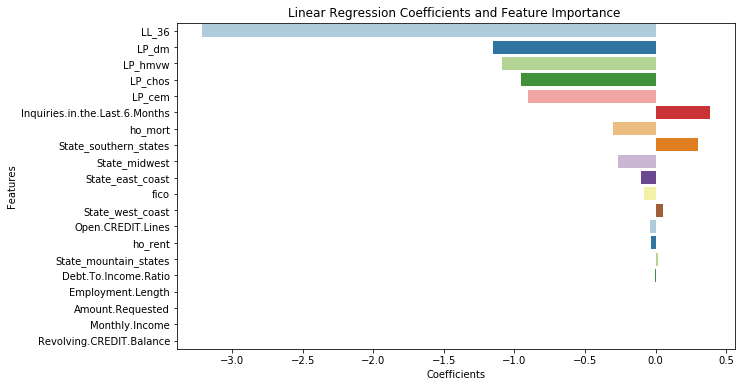

In [52]:
import matplotlib.pyplot as plt

# Extracting feature names and coefficients
features, coefs = zip(*list(zip(features, coefs)))

# Create a DataFrame to store the features and coefficients
df = pd.DataFrame({'Features': features, 'Coefficients': coefs})

# Sort the DataFrame by absolute coefficient values for better visualization
df['Abs_Coefficients'] = abs(df['Coefficients'])
df = df.sort_values('Abs_Coefficients', ascending=False)

# Plot the coefficients using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficients', y='Features', data=df, orient='h',palette='Paired')
plt.xlabel('Coefficients')
plt.ylabel('Features')
plt.title('Linear Regression Coefficients and Feature Importance ')
plt.show()

##### Residual Plot: A scatter plot of the residuals to visualize the distribution of the model's errors. This plot helps to check for any patterns or heteroscedasticity in the residuals. x-axis representing the predicted interest rates and the y-axis representing the residuals. Points above the horizontal line at y=0 indicate overpredictions, while points below the line indicate underpredictions.

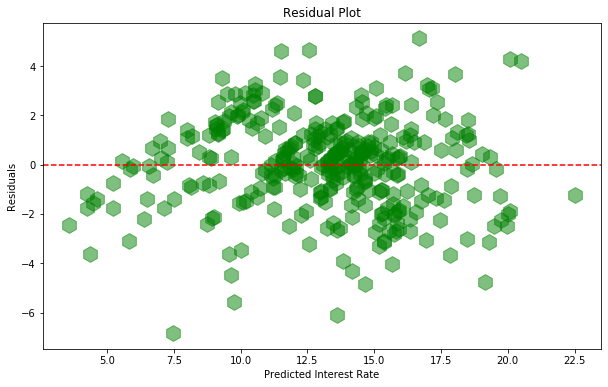

In [53]:
# Creating a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(p_test, residual, alpha=0.5, marker="h", edgecolor="green", s=250, c="green")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Interest Rate')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


##### Actual vs. Predicted Plot: To visually compare the actual interest rates and the predicted interest rates, a scatter plot with the actual interest rates on the x-axis and the predicted interest rates on the y-axis. This plot helps to assess the model's accuracy.  The scatter plot will also include a diagonal line (dashed red line) that represents perfect predictions, i.e., where the predicted interest rate is exactly equal to the actual interest rate. Points closer to this line indicate more accurate predictions.

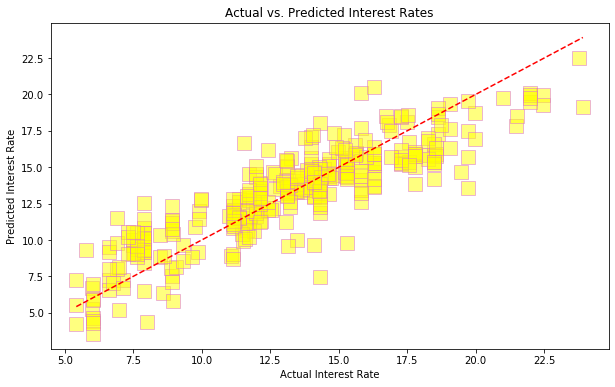

In [54]:
# Creating a scatter plot of actual vs. predicted interest rates
plt.figure(figsize=(10, 6))
plt.scatter(y_test, p_test, alpha=0.5, marker="s", edgecolor="orchid", s=200, c="yellow")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Interest Rate')
plt.ylabel('Predicted Interest Rate')
plt.title('Actual vs. Predicted Interest Rates')
plt.show()
